In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data Collection

In [107]:
gold_data = pd.read_csv('/Users/montikachaikittiporn/Downloads/gld_price_data.csv')
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [108]:
gold_data.shape

(2290, 6)

In [109]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [110]:
#Checking the missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [111]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation

In [112]:
correlation = gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

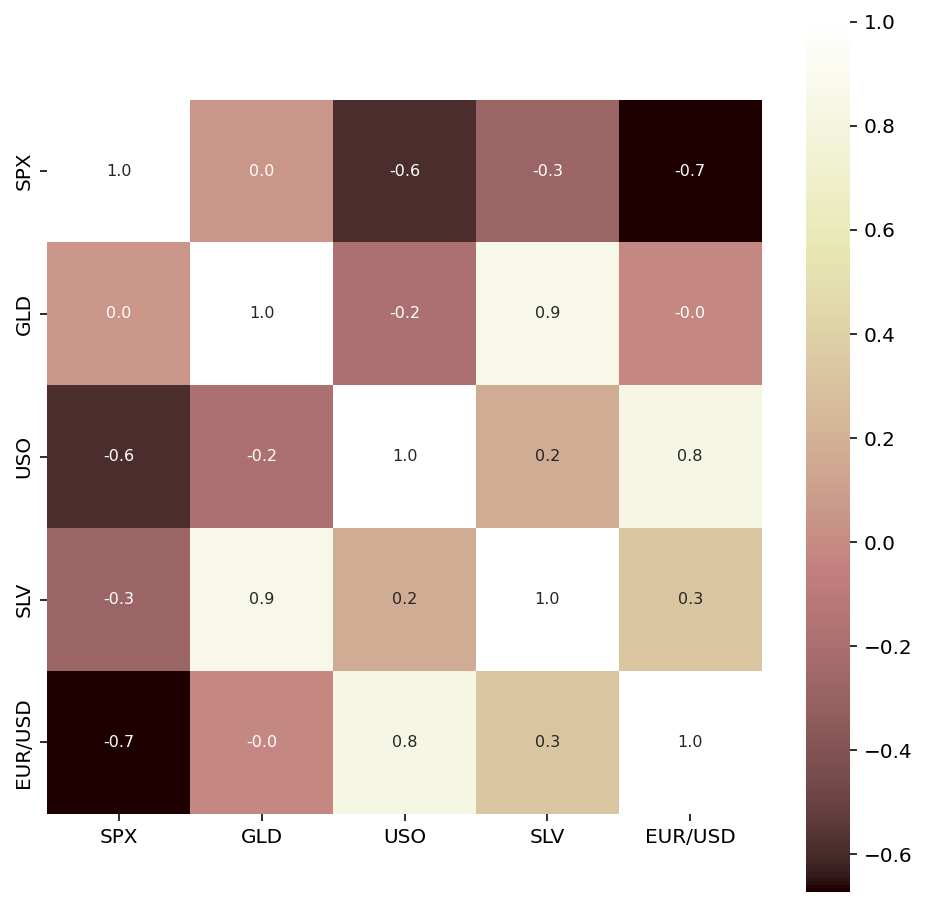

In [113]:
#Heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='pink')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

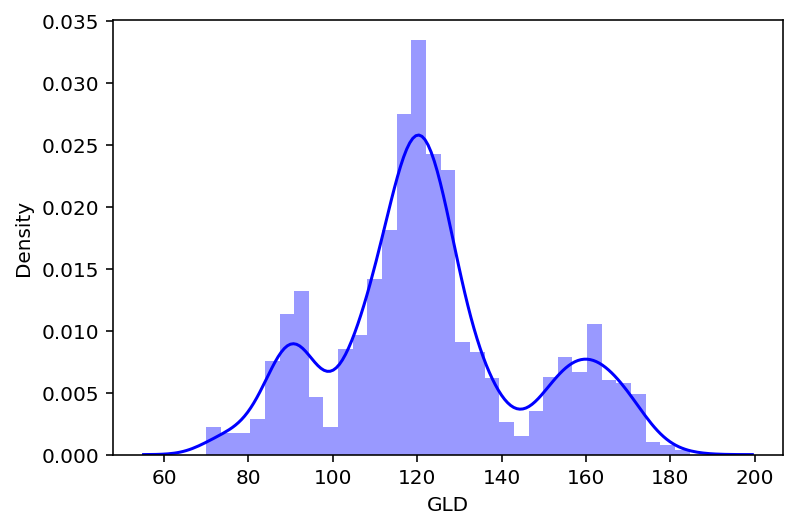

In [114]:
#Checking the distribution of GLD Price
sns.distplot(gold_data['GLD'],color='blue')

In [115]:
x = gold_data[['SPX','USO','SLV','EUR/USD']]
y = gold_data['GLD']

In [116]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [117]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

## Spiliting into train and test data

In [118]:

x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size=0.2,
                                                    random_state=2)
#random_state คือ ค่า seed ที่กำหนดการ random กลุ่มข้อมูล จะเป็นเลขจำนวนเต็ม ถ้ากำหนดเลขเดิม ผลการ split ก็เหมือนเดิม

## Model training: Random Forest Regression

In [119]:
regressor = RandomForestRegressor(n_estimators=100)

In [120]:
#Train data
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [121]:
test_predict = regressor.predict(x_test)
test_predict

array([168.48229925,  82.09009941, 116.16440025, 127.6729008 ,
       120.65760131, 154.50279799, 149.7945982 , 126.10840072,
       117.58529892, 125.9487011 , 116.62830143, 171.64210082,
       140.88829826, 167.80439859, 115.14229986, 117.64660034,
       138.96780243, 169.77760018, 159.42450283, 158.1706995 ,
       155.02379967, 125.21249994, 175.96599924, 156.96940371,
       125.21860059,  93.67590007,  77.71540009, 120.57380005,
       119.15199964, 167.52019899,  87.90200078, 125.23230003,
        91.17060058, 117.70090031, 121.08109922, 135.71200142,
       115.39300135, 115.11770097, 147.90329848, 107.12200083,
       104.59770236,  87.25859793, 126.46980079, 118.01720006,
       152.76409834, 119.65219991, 108.54809982, 108.21539833,
        93.27010062, 127.05339782,  74.41410042, 113.71629904,
       121.3712001 , 111.281699  , 118.90549905, 120.51489925,
       159.0864007 , 167.53370103, 146.97749707,  86.03539865,
        94.2886003 ,  86.95649894,  90.49650012, 118.91

In [122]:
#R^2
error_score = metrics.r2_score(y_test, test_predict)
error_score

0.9891702566756835

## Compare the actual value and predict value in a plot

In [123]:
y_test = list(y_test)

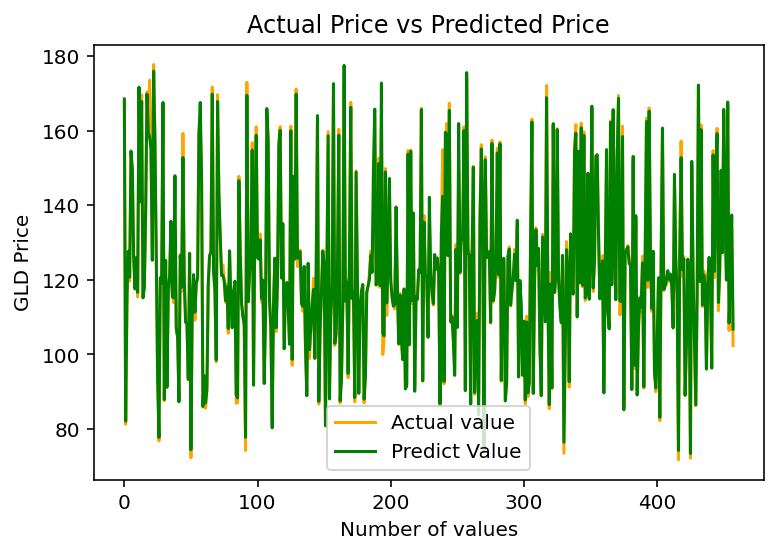

In [124]:
plt.plot(y_test, color='orange',label = 'Actual value')
plt.plot(test_predict, color='green',label='Predict Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()